# VGG-16

In [2]:
from VGG_16 import VGG_16
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


## Load CIFAR-10 Dataset

In [4]:
# Load CIFAT-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normallize images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step



## Build and compile the model

In [6]:
# Define inputs and outputs
n_classes = 10
input_shape = (32, 32, 3)
inputs = tf.keras.Input(shape=input_shape)
outputs = VGG_16(inputs, n_classes)

# Build VGG-16 model
model = tf.keras.Model(inputs, outputs, name="VGG16_CIFAR10")

# Compile
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.00001),
    metrics=["accuracy"]
)

## Model Summary

In [7]:
model.summary()

Model: "VGG16_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv_1 (Conv2D)          │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv_2 (Conv2D)          │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool_2 (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv_1 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv_2 (Conv2D)          │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool_2 (MaxPooling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_1 (Conv2D)          │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_2 (Conv2D)          │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_3 (Conv2D)          │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool_3 (MaxPooling2D)    │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_1 (Conv2D)          │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_2 (Conv2D)          │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_3 (Conv2D)          │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool_3 (MaxPooling2D)    │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_1 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_2 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_3 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool_3 (MaxPooling2D)    │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prediction (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)


## Train the model

In [8]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50


I0000 00:00:1741107303.185522     101 service.cc:145] XLA service 0x7b5d8c0031e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741107303.185580     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.0987 - loss: 2.3026

I0000 00:00:1741107308.444770     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.1627 - loss: 2.1470 - val_accuracy: 0.2151 - val_loss: 1.9363
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.2495 - loss: 1.8671 - val_accuracy: 0.3092 - val_loss: 1.7633
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.3304 - loss: 1.7174 - val_accuracy: 0.3616 - val_loss: 1.6215
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.3840 - loss: 1.5828 - val_accuracy: 0.4222 - val_loss: 1.4992
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4350 - loss: 1.4717 - val_accuracy: 0.4700 - val_loss: 1.3836
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4777 - loss: 1.3817 - val_accuracy: 0.4891 - val_loss: 1.3846
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5077 - loss: 1.3148 - val_accuracy: 0.5128 - val_loss: 1.3118
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5339 - loss: 1.2495 - val_accurac


## Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_loss, test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.6493 - loss: 2.2573
2.257286787033081 0.6492999792098999


## Plot Learning Curves

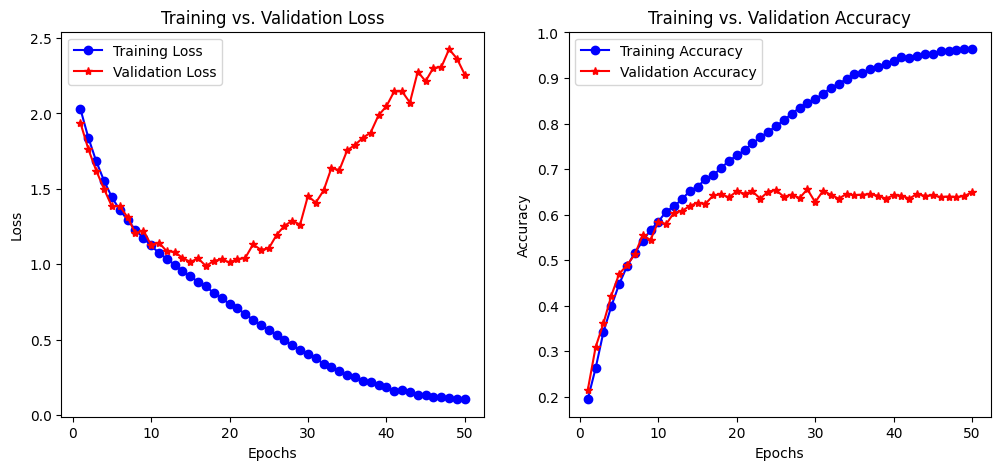

In [10]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.show()